In [566]:
import numpy as np
import matplotlib.pyplot as plt
import math

\begin{align}
\mathcal{L}(x \mid \theta)=\frac{\exp (-x / \theta)}{\theta}
\end{align}

In [567]:
def exp_dist(x, theta):
    return 1/theta * np.exp(-x/theta)

In [568]:
def prior_dist (theta,alpha,beta):
    return (beta**alpha)/math.gamma(alpha) * (theta**(-(alpha+1))) * np.exp(-beta/theta)

In [569]:
x_sample = np.array([5/2, 3/2, 1])

theta_sample = np.linspace(0.1, 10, 1000)


likelihood = np.array([np.prod(exp_dist(x_sample, theta)) for theta in theta_sample])

prior = np.array([prior_dist(theta, 1, 1) for theta in theta_sample])

posterior = likelihood * prior

posterior_to_minimise = lambda theta : - np.prod(exp_dist(x_sample, theta)) * prior_dist(theta, 1, 1)

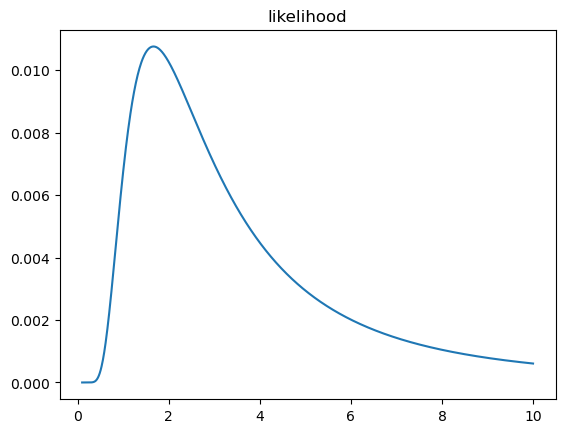

In [570]:
# plot the likelihood
plt.plot(theta_sample, likelihood)
plt.title('likelihood')
plt.show()

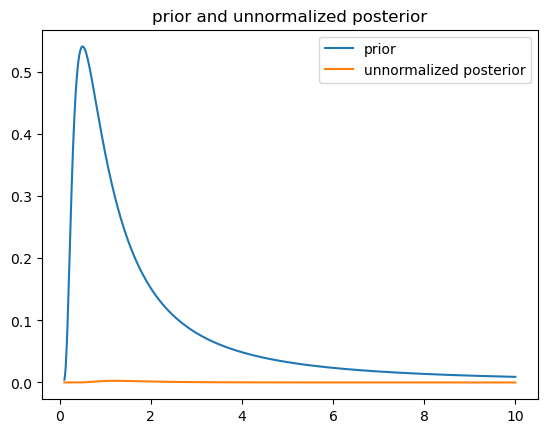

In [571]:
# plot the prior and unnormalized posterior
plt.plot(theta_sample, prior, label='prior')
plt.plot(theta_sample, posterior, label='unnormalized posterior')
plt.title('prior and unnormalized posterior')
plt.legend()

In [572]:
# find the the theta that maximizes the posterior
from scipy.optimize import minimize
result = minimize(posterior_to_minimise, 1)
theta_max = result.x[0]
print(theta_max)

1.1997700057012


Text(0.5, 1.0, 'maximum of the unnormalized posterior')

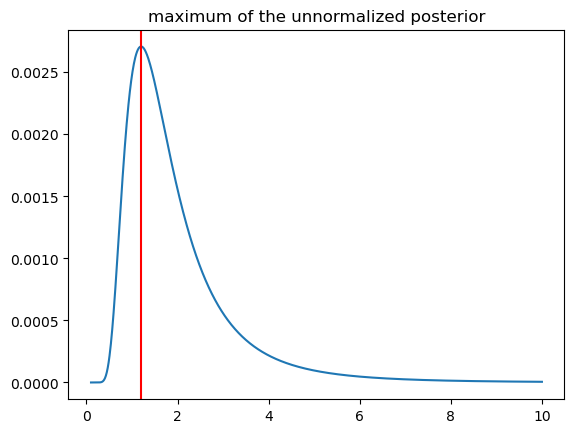

In [573]:
# plot the maximum theta
plt.plot(theta_sample, posterior, label='unnormalized posterior')
plt.axvline(result.x, color='r', label='maximum')
plt.title('maximum of the unnormalized posterior')

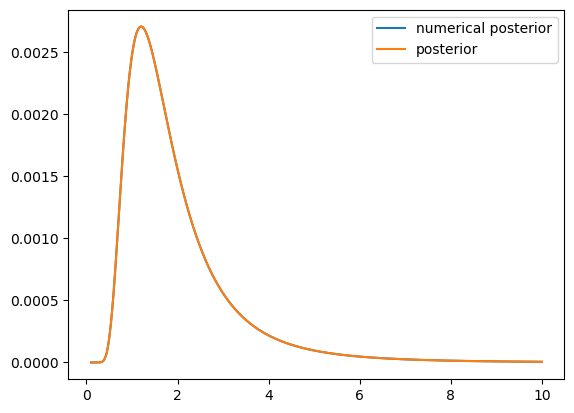

In [574]:
posterior_numerical = np.array([np.exp(-6/theta)/(theta**5) for theta in theta_sample])
plt.plot(theta_sample, posterior_numerical, label='numerical posterior')
plt.plot(theta_sample, posterior, label='posterior')
plt.legend()
plt.show()

In [575]:
6/theta_max , 5 * np.log(theta_max)

(5.000958493284993, 0.9106493825439789)

In [576]:
# evaluate the evidence using the 

\begin{align}
Z=\frac{\beta^\alpha}{\left(\beta+\sum_{i=1}^N x^i\right)^{(\alpha+N)}} \frac{\Gamma(\alpha+N)}{\Gamma(\alpha)}
\end{align}

In [577]:
# Analitycal evidence
def evidence_analytical(x,alpha,beta):
    return (beta**alpha)/math.gamma(alpha) * math.gamma(alpha + len(x)) / (beta + np.sum(x))** (alpha + len(x))

In [578]:
evidence_analytical(x_sample,1,1)

0.004629629629629629

In [579]:
def laplace_approximation(x, alpha = 1,beta = 1):
    posterior_to_minimise = lambda theta : - np.prod(exp_dist(x, theta)) * prior_dist(theta, alpha, beta)
    result = minimize(posterior_to_minimise, 1)
    theta_max = result.x[0]
    posterior = lambda theta : np.prod(exp_dist(x, theta)) * prior_dist(theta, alpha, beta)
    # second derivative of the log of the posterior
    log_posterior = lambda theta : np.log(posterior(theta))
    h = 0.0000001
    log_posterior_double_prime_theta_max = (log_posterior(theta_max + h) - 2*log_posterior(theta_max) + log_posterior(theta_max - h)) / h**2
    
    return np.sqrt(2 * np.pi / - log_posterior_double_prime_theta_max) * posterior(theta_max)
    
    

In [580]:
laplace_approximation(x_sample, 1, 1)

0.0036946163500915226

In [581]:
# read from lifetimes.txt by read lines, separated by comma

# Open the file in read mode
with open('lifetimes.txt', 'r') as file:
    # Read all lines into a list
    lines = file.readlines()

# Initialize an empty list to store the data
data = []

# Split each line by comma and append to data list
for line in lines:
    line_data = line.strip().split(',')
    data.append(line_data)

data = np.array(data).flatten().astype(float)


In [582]:
data

array([1.22543   , 2.28995   , 0.0765578 , 0.273483  , 0.0326272 ,
       2.21291   , 0.691608  , 1.5394    , 0.190957  , 0.588204  ,
       0.214819  , 0.526133  , 0.241459  , 0.140623  , 0.628795  ,
       0.52382   , 0.535621  , 0.12292   , 2.12524   , 0.0482703 ,
       1.67426   , 0.00806649, 3.79265   , 0.208549  , 0.599776  ,
       0.168408  , 1.31072   , 0.253883  , 0.373873  , 1.29221   ,
       0.0727334 , 2.08186   , 1.81474   , 1.9293    , 0.165165  ,
       0.275968  , 0.850653  , 1.00761   , 0.130893  , 0.591911  ,
       0.754965  , 0.760503  , 0.990734  , 0.833527  , 0.925841  ,
       0.0110312 , 0.0456368 , 0.570373  , 1.78373   , 0.157806  ])

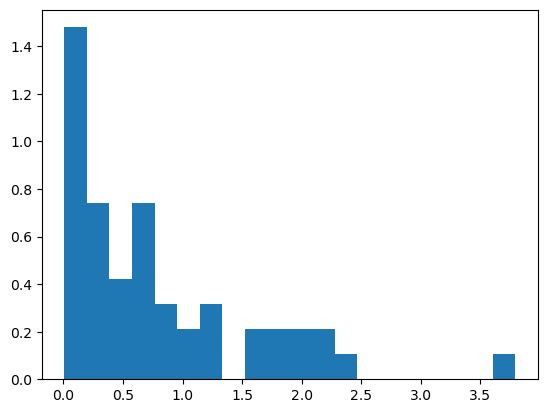

In [588]:
# plot the histogram of the lifetimes
plt.hist(data, bins=20, density=True)
plt.show()

In [584]:
likelihood = np.array([np.prod(exp_dist(data, theta)) for theta in theta_sample])

prior = np.array([prior_dist(theta, 1, 1) for theta in theta_sample])

posterior = likelihood * prior

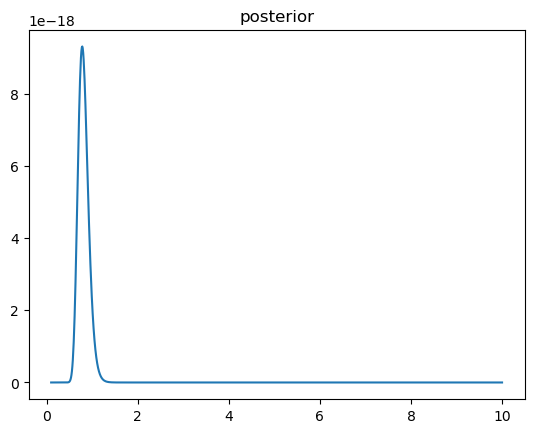

In [585]:
# plot posterior
plt.plot(theta_sample, posterior)
plt.title('posterior')
plt.show()


In [586]:
evidence_analytical(data,1,1)

2.5832113002887616e-18

In [587]:
laplace_approximation(data, 1, 1)

1.0012961394197801e-18